In [1]:
import json

from autogen import config_list_from_json
from autogen import AssistantAgent, UserProxyAgent

llm_config = config_list_from_json(
    "OAI_CONFIG_LIST",
    filter_dict={"model": ["gpt-4"]},
)[0]
coder = AssistantAgent(name="coder", llm_config=llm_config)
user = UserProxyAgent(name="user", code_execution_config={
    "work_dir": "/tmp/coding"
},
is_termination_msg=lambda x: "TERMINATE" in x.get("content"),
human_input_mode="NEVER")

user.initiate_chat(coder, message="Find latest paper about GPT-4 on arxiv.")

chat_history = coder.chat_messages[user]

user (to coder):

Find latest paper about GPT-4 on arxiv.

--------------------------------------------------------------------------------
coder (to user):

To get the latest paper about GPT-4 on arXiv, you can use the "arxiv" API. Here is the Python code to fetch the latest articles about GPT-4 from arXiv.

This program uses the 'arxiv' and 'feedparser' modules. 'arxiv' is the module used for the interaction with arxiv.org, and 'feedparser' is used for parsing the RSS feed returned by arxiv.org.

You'd need to install these modules if they are not installed yet. You can install them using 'pip':
```shell
pip install arxiv feedparser
```

And here's the python code:

```python
# filename: find_gpt4.py

import arxiv
import feedparser

# Search for papers on GPT-4
search = arxiv.Search(
  query = 'GPT-4',
  max_results = 100,
  sort_by = arxiv.SortCriterion.SubmittedDate
)

# Find the newest one
papers = list(search.get())
latest_paper = papers[0]
print("Latest paper about GPT-4 on arXi

execute_code was called without specifying a value for use_docker. Since the python docker package is not available, code will be run natively. Note: this fallback behavior is subject to change



>>>>>>>> EXECUTING CODE BLOCK 1 (inferred language is python)...


execute_code was called without specifying a value for use_docker. Since the python docker package is not available, code will be run natively. Note: this fallback behavior is subject to change


user (to coder):

exitcode: 1 (execution failed)
Code output: 
Defaulting to user installation because normal site-packages is not writeable

Traceback (most recent call last):
  File "find_gpt4.py", line 14, in <module>
    papers = list(search.get())
AttributeError: 'Search' object has no attribute 'get'


--------------------------------------------------------------------------------
coder (to user):

I apologize for the error. There appears to be a mistake in the API use; the Search object does not have a 'get' method. Instead, the object itself can be iterated over to get the search results. Let's modify the code. 

Here is the corrected script:
```python
# filename: find_gpt4.py

import arxiv

# Search for papers on GPT-4
search = arxiv.Search(
  query = 'GPT-4',
  max_results = 100,
  sort_by = arxiv.SortCriterion.SubmittedDate
)

# Collect all papers
papers = [paper for paper in search.results()]

# Find the newest one
latest_paper = papers[0]
print("Latest paper about GPT-4 o

execute_code was called without specifying a value for use_docker. Since the python docker package is not available, code will be run natively. Note: this fallback behavior is subject to change


user (to coder):

exitcode: 0 (execution succeeded)
Code output: 
Latest paper about GPT-4 on arXiv:
Title: Using GPT-4 Prompts to Determine Whether Articles Contain Functional Evidence Supporting or Refuting Variant Pathogenicity
Authors: Samuel J. Aronson, Kalotina Machini, Pranav Sriraman, Jiyeon Shin, Emma R. Henricks, Charlotte Mailly, Angie J. Nottage, Michael Oates, Matthew S. Lebo
Published on: 2023-12-21 01:56:00+00:00
Abstract: Purpose: To assess Generative Pre-trained Transformer version 4's (GPT-4)
ability to classify articles containing functional evidence relevant to
assessments of variant pathogenicity.
  Results: GPT-4 settings and prompts were trained on a set of 45 articles and
genetic variants. A final test set of 72 manually classified articles and
genetic variants were then processed using two prompts. The prompts asked GPT-4
to supply all functional evidence present in an article for a variant or
indicate that no functional evidence is present. For articles with h

[
  {
    "content": "Find latest paper about GPT-4 on arxiv.",
    "role": "user",
    "codes": [
      "USER_REQUEST"
    ]
  },
  {
    "content": "To get the latest paper about GPT-4 on arXiv, you can use the \"arxiv\" API. Here is the Python code to fetch the latest articles about GPT-4 from arXiv.\n\nThis program uses the 'arxiv' and 'feedparser' modules. 'arxiv' is the module used for the interaction with arxiv.org, and 'feedparser' is used for parsing the RSS feed returned by arxiv.org.\n\nYou'd need to install these modules if they are not installed yet. You can install them using 'pip':\n```shell\npip install arxiv feedparser\n```\n\nAnd here's the python code:\n\n```python\n# filename: find_gpt4.py\n\nimport arxiv\nimport feedparser\n\n# Search for papers on GPT-4\nsearch = arxiv.Search(\n  query = 'GPT-4',\n  max_results = 100,\n  sort_by = arxiv.SortCriterion.SubmittedDate\n)\n\n# Find the newest one\npapers = list(search.get())\nlatest_paper = papers[0]\nprint(\"Latest pa

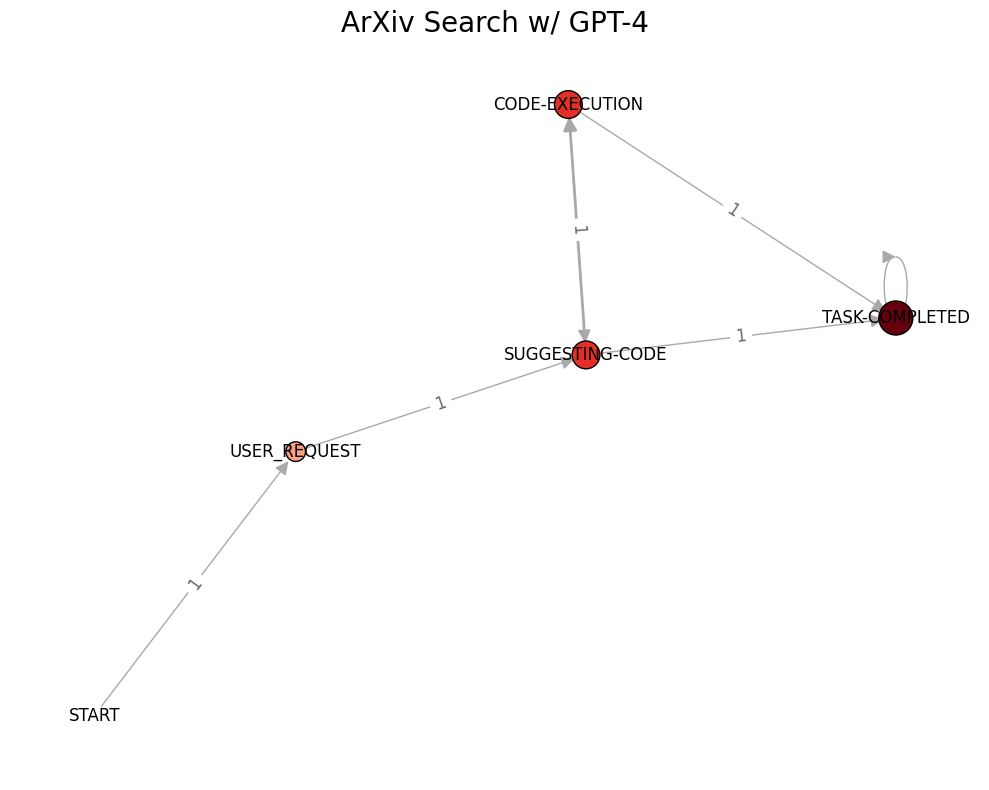

In [2]:
from autogen.agentchat.contrib.profiler import annotate_chat_history, draw_profiler_graph

# Annotate chat history
annotated_chat_history = annotate_chat_history(chat_history, llm_config=llm_config)

print(json.dumps(annotated_chat_history, indent=2))

# Visualize annotated chat history
draw_profiler_graph(
    annotated_chat_history,
    title="ArXiv Search w/ GPT-4",
    output_dir="/tmp",
    filename="profiler_graph.png",
)

[
  {
    "content": "Find latest paper about GPT-4 on arxiv.",
    "role": "user",
    "codes": [
      "USER_REQUEST"
    ]
  },
  {
    "content": "To get the latest paper about GPT-4 on arXiv, you can use the \"arxiv\" API. Here is the Python code to fetch the latest articles about GPT-4 from arXiv.\n\nThis program uses the 'arxiv' and 'feedparser' modules. 'arxiv' is the module used for the interaction with arxiv.org, and 'feedparser' is used for parsing the RSS feed returned by arxiv.org.\n\nYou'd need to install these modules if they are not installed yet. You can install them using 'pip':\n```shell\npip install arxiv feedparser\n```\n\nAnd here's the python code:\n\n```python\n# filename: find_gpt4.py\n\nimport arxiv\nimport feedparser\n\n# Search for papers on GPT-4\nsearch = arxiv.Search(\n  query = 'GPT-4',\n  max_results = 100,\n  sort_by = arxiv.SortCriterion.SubmittedDate\n)\n\n# Find the newest one\npapers = list(search.get())\nlatest_paper = papers[0]\nprint(\"Latest pa

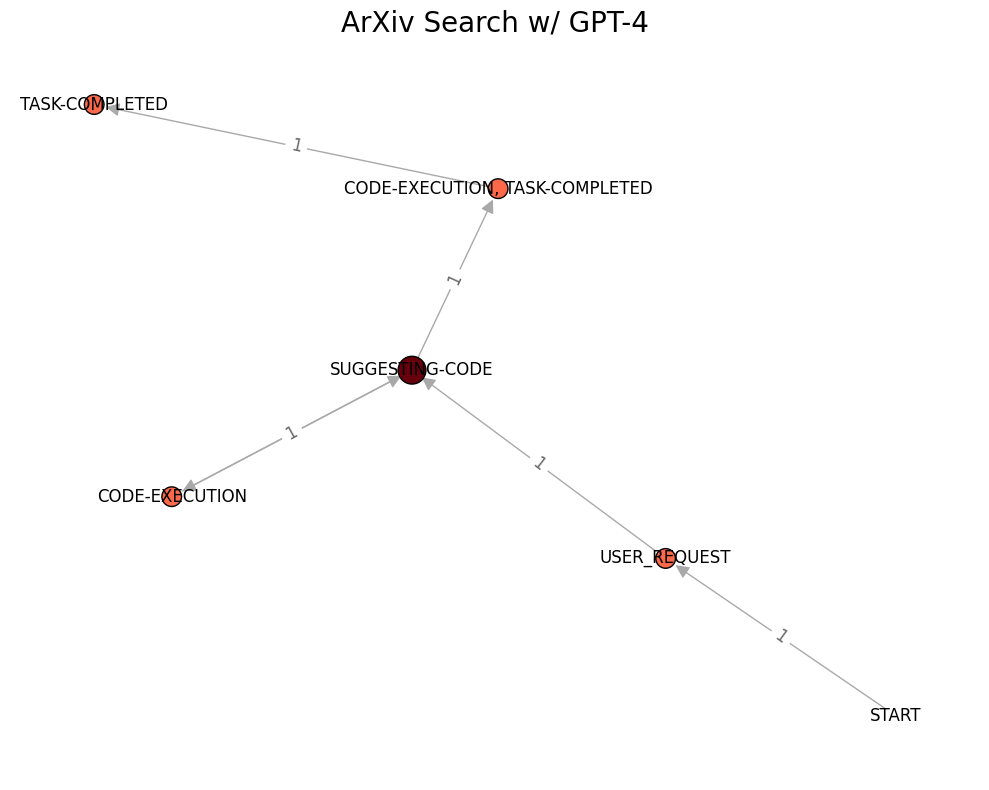

In [3]:
# visualization with collate codes is true

from autogen.agentchat.contrib.profiler import annotate_chat_history, draw_profiler_graph

# Annotate chat history
annotated_chat_history = annotate_chat_history(chat_history, llm_config=llm_config, collate_codes=True)

print(json.dumps(annotated_chat_history, indent=2))

# Visualize annotated chat history
draw_profiler_graph(
    annotated_chat_history,
    title="ArXiv Search w/ GPT-4",
    output_dir="/tmp",
    filename="profiler_graph.png",
)